# Algoritmo Genético

Este notebook aplica o algoritmo genético annealing à função Rastrigin.

# Importando pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from visual import histeq

# Funções

In [2]:
# calculando a phi
def rastrigin(p0):
    '''
    Calcula a função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    phi: array 1D - valor da função calculada em cada ponto (p1, p2)
    '''
    phi = 10.*2 + p0[0]*p0[0] + p0[1]*p0[1] - 10.*np.cos(2.*np.pi*p0[0]) - 10.*np.cos(2.*np.pi*p0[1])
    
    return phi

## Plotando a função

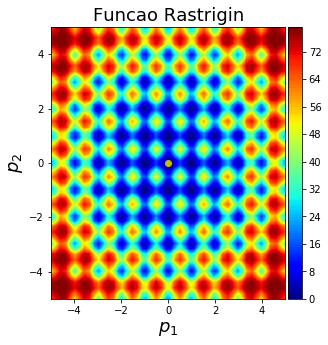

In [3]:
# numero de parametros de p1 e p2
np1 = 50
np2 = 50

#definindo os parâmetros
p1 = np.linspace(-5., 5., np1)
p2 = np.linspace(-5., 5., np2)

#criando um grid
p1, p2 = np.meshgrid(p1, p2)

# calculando a phi
phi = rastrigin([p1,p2])

# equalizando as cores
phi_eq = histeq(phi)
phi_eq = np.reshape(phi_eq,(np1,np2))

#plot
plt.figure(figsize=(5,5))
plt.plot(0., 0., 'oy')
plt.title('Funcao Rastrigin', fontsize=18)
plt.contourf(p1, p2, phi_eq, 100, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.savefig('plot_rosenbrock.png', pad_inches=0.0)
plt.show()


# Funções auxiliares para o algoritmo genético

In [4]:
def funcao(n,pop):
    '''
    Calcula da função para uma população.
    
    input:
    n - integer - número de indivíduos
    pop - 2D array (n,M) - população (cada linha representa um indivíduo)
    
    output:
    f - 1D array - valores da função para cada indivíduo
    '''
    f = np.zeros(n)

    for j, p in enumerate(pop):
        f[j] = rastrigin(p)
    
    return f

In [5]:
def aptidao(f):
    '''
    Esta função calcula a aptidão de uma população
    através do vetor que possui o valor da função
    objeto para cada indivíduo.
    
    input:
    f - 1D array - valores da função para cada indivíduo
    
    output:
    s - 1D array - aptidão de cada indivíduo 
    '''
    s = 1./(1. + abs(f))
    s /= np.sum(s)
    
    return s

In [6]:
def cruzamento(n, M, pop, s):
    '''
    Esta função seleciona os indivíduos pais, faz o cruzamento
    e gera uma população de filhos.
    
    input:
    n - integer - número de indivíduos
    M - integer - número de gens
    pop - 2D array (n,M) - população (cada linha representa um indivíduo)
    s - 1D array - aptidão para cada da população
    
    output:
    popf - 2D array - população de filhos 
    '''
    # selecionando pais e maes para o cruzamento
    i_pai = []
    i_mae = []
    for i in range(n):
        i1, i2 = np.random.choice(np.arange(n), size=M, replace=False, p=s)
        i_pai.append(i1)
        i_mae.append(i2)
        
    # cruzamento
    popf = np.zeros_like(pop)
    popf[:, 0] = (pop[i_pai, 0]*s[i_pai] + pop[i_mae, 0]*s[i_mae])/(s[i_pai] + s[i_mae])
    popf[:, 1] = (pop[i_pai, 1]*s[i_pai] + pop[i_mae, 1]*s[i_mae])/(s[i_pai] + s[i_mae])
    
    return popf

In [7]:
def mutacao(n, M, pop, prob):
    '''
    Esta função seleciona aleatoriamente
    um gen e aplica uma mutação sobre ele.
    
    input:
    n - integer - número de indivíduos
    M - integer - número de gens
    pop - 2D array (n,M) - população (cada linha representa um indivíduo)
    prob - float - probabilidade de haver mutação
    
    output:
    pop - 2D array - população (pode ou não ter sofrido mutação)
    '''
    # mutação
    prob = 0.1
    for i in range(n):
        rand = np.random.rand()
        if rand <= prob:
            i_mut = np.random.choice(np.arange(M))
            pop[i,i_mut] *= (np.random.uniform(low=-5.0, high=5.0, size=None)/10.)
    
    return pop

In [8]:
def elitismo(n, popp, popf, fp, ff, sp, sf):
    '''
    Esta seleciona aleatoriamente um gen e aplica uma mutação sobre ele.
    
    input:
    n - integer - número de indivíduos
    popp - 2D array (n,M) - população de pais (cada linha representa um indivíduo)
    popf - 2D array (n,M) - população de filhos (cada linha representa um indivíduo)
    fp - 1D array - valores da função para cada pai
    ff - 1D array - valores da função para cada filho
    sp - 1D array - aptidão para cada pai
    sf - 1D array aptidão para cada filho
    
    output:
    popn - 2D array - população nova
    '''
    nr = n/20 # número de filhos replicados
    
    # juntando pais e filhos
    popt = np.vstack((popp, popf))
    ft = np.hstack((fp, ff))
    
    # ordenando e selecionando os melhores indivíduos
    i_ord = np.argsort(ft)
    popn = popt[i_ord[:n]]
    fn = ft[i_ord[:n]]
    
    # replicando os melhores filhos
    if nr >= 1:
        popn[-nr:] = popn[:nr]
        fn[-nr:] = fn[:nr]
        
    sn = sn = aptidao(fn)
    
    return popn, fn, sn

# Chute inicial

In [9]:
# número de gens
M = 2

# número de indivíduos
n = 20

# criando a população
for i in range(n):
        pop0 = 10.*np.random.rand(n,2) - 5.

In [10]:
# avaliando a função para a população inicial
f0 = funcao(n, pop0)

In [11]:
# calculando a aptidão
s0 = aptidao(f0)

In [12]:
# selecionando o melhor indivíduo do chute inicial
i_melhor = np.argmax(s0)

# armazenando o melhor indivíduo do chute inicial
p1_list = [pop0[i_melhor,0]]
p2_list = [pop0[i_melhor,1]]
phi_list = [f0[i_melhor]]

# número de iterações máximo
itmax = 20

# tolerância
tol = 1e-5

# Algoritmo genético

In [13]:
for it in range(itmax):
    #print pop0
    # cruzamento
    popf = cruzamento(n, M, pop0, s0)
    #print popf
    
    # mutação    
    popf = mutacao(n, M, popf, 0.1)

    # avaliando a função para os filhos
    f = funcao(n, popf)

    # calculando a aptidão dos filhos
    s = aptidao(f)

    # elitismo
    popn, fn, sn = elitismo(n, pop0, popf, f0, f, s0, s)
    
    # selecionando o melhor indivíduo da população
    i_melhor = np.argmax(sn)

    # armazenando o melhor indivíduo da população
    p1_list.append(popn[i_melhor,0])
    p2_list.append(popn[i_melhor,1])
    phi_list.append(fn[i_melhor])
    
    print pop0 - popn
    
    print 'iteração: %3d   p1: %.2f   p2: %.2f   f: %.2e' % (it, popn[i_melhor,0], popn[i_melhor,1], fn[i_melhor])
    
    # atualiza as variáveis
    pop0 = popn.copy()
    f0 = fn.copy()
    s0 = sn.copy()

[[ 2.14715296  2.95626969]
 [ 1.52248943 -1.60654713]
 [-6.05421087 -3.08340858]
 [-6.28739536  3.09834078]
 [-4.31946065 -5.7257446 ]
 [ 0.76418265  0.04355221]
 [ 1.03099605 -1.409516  ]
 [ 1.72889507 -1.99511473]
 [ 1.28585992 -0.67148874]
 [ 2.37005005  1.89362999]
 [ 3.89974428  1.76401342]
 [-3.39010015 -1.0881525 ]
 [ 6.92098462  3.31458804]
 [-0.7107124  -1.03566145]
 [ 0.86616961 -7.10792078]
 [ 2.99001429  6.91905489]
 [-1.6309564  -0.27473167]
 [-0.09686988 -0.35972633]
 [-3.47362509 -5.31816807]
 [-0.80871344  4.31804908]]
iteração:   0   p1: 0.99   p2: -0.00   f: 9.96e-01
[[ 0.          0.        ]
 [-0.07390032  0.05822206]
 [ 1.0069243   1.0498954 ]
 [ 1.0606484   1.11029791]
 [-0.01255122  1.81042404]
 [ 0.24274165  1.00634319]
 [ 1.20795836  1.07613408]
 [ 1.20795836  1.07613408]
 [ 0.77343904  1.01465401]
 [-0.83920808 -0.39599783]
 [-1.77181264  1.06465806]
 [ 1.903966   -1.94842112]
 [-5.19271229 -2.16843103]
 [ 1.08650456  1.84597177]
 [ 2.37896153  2.97460638]
 [ 

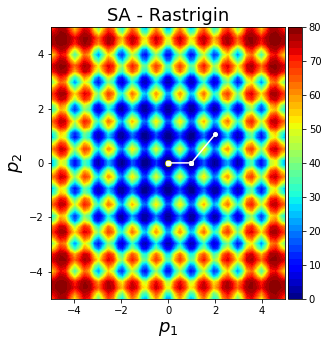

In [14]:
#plot
plt.figure(figsize=(5,5))
plt.plot(0., 0., 'oy')
plt.plot(p1_list, p2_list, '.w-', markersize=8)
plt.title('SA - Rastrigin', fontsize=18)
plt.contourf(p1, p2, phi_eq, 40, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.show()

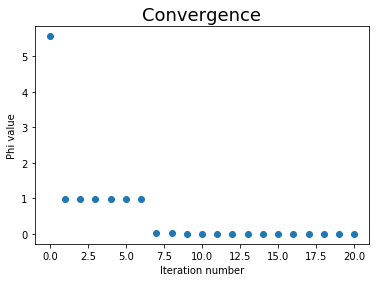

In [15]:
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.ylabel('Phi value')
plt.plot(phi_list, 'o')
#plt.savefig('convergence.png', dpi=300)
plt.show()